# Pulse level circuit simulation
https://qutip.org/docs/latest/guide/qip/qip-processor.html#qip-processor
## QuantumCircuit

In [16]:
import numpy as np
import matplotlib as plt
from qutip.qip.device import Processor
from qutip.qip.device import OptPulseProcessor
from qutip.qip.circuit import QubitCircuit
from qutip.qip.pulse import Pulse
from qutip import basis, fidelity, sigmax, sigmay, sigmaz, tensor, about

In [17]:
from scipy.signal.windows import dpss

In [18]:
num_qubits = 2
Fs = 2
N = 100
# time window N*(1/Fs)
NW = 6    # Time-halfbandwidth product
# Generating the Slepian sequences
slepian_sequence = dpss(N+1, NW)

(<Figure size 1200x600 with 1 Axes>, [<Axes: >])

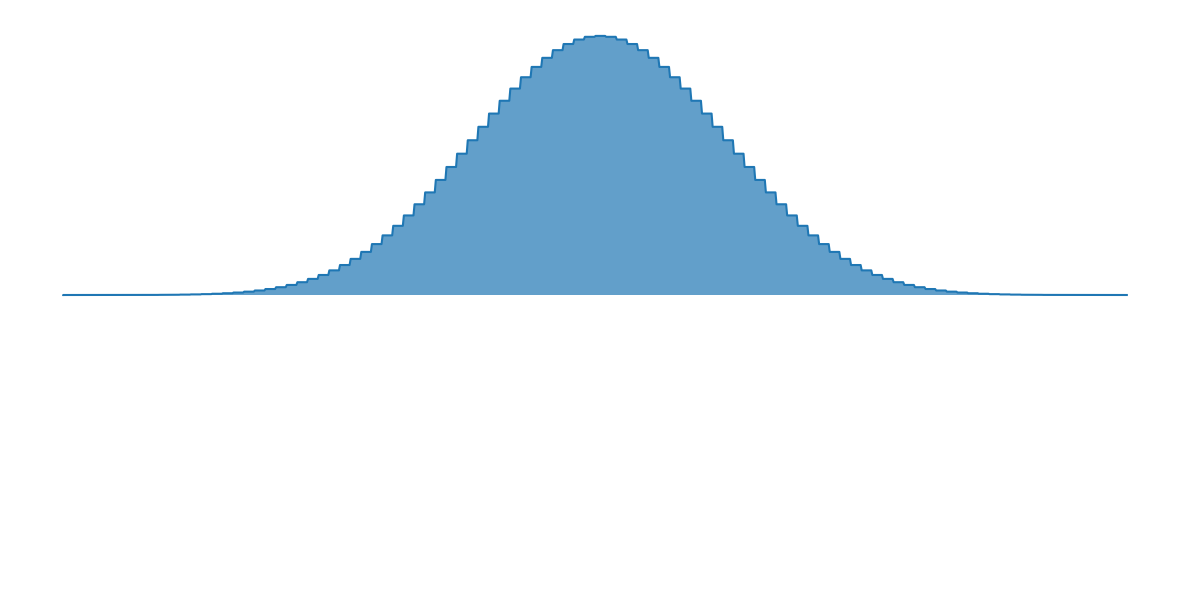

In [19]:
processor = Processor(N=2, spline_kind="step_func") # or "cubic"
tlist = np.arange(N+1)/Fs 
coeff = slepian_sequence
pulse= Pulse(sigmaz(),targets=0, coeff=coeff, tlist=tlist)
processor.add_pulse(pulse)
processor.plot_pulses()

### OptPulseProcessor 
GRAPE algorithm or CRAB alogorithm

In [37]:
qc = QubitCircuit(N=2)
qc.add_gate("X", 0)
qc.add_gate("ISWAP", targets=[0, 1])


WTF is "num_tslots" and "evo_time"

num_tslots: number of time slices 
evo_time: evolution time

My Hamiltonian  (assuming all qubits are perfect two level system)
$$H(t) = H_0 + H_{int}(t) + H_{d1}(t) + H_{d2}(t) $$
$$\Big[ -\frac{1}{2}\omega_{q1}(\Phi_1(t)) \hat{\sigma}_{z1} \Big ] +
\Big[-\frac{1}{2}\omega_{q2}(\Phi_2(t)) \hat{\sigma}_{z2} \Big] +
\Big[g(t)\hat\sigma_{y1}\hat\sigma_{y2}\Big] +
\Big[\Omega_1V_{d1}(t)\hat{\sigma}_{y1} \Big] + \Big[\Omega_1V_{d1}(t)\hat{\sigma}_{y2}\Big]$$

In [43]:
num_qubits = 2
omega1 = 0.01 * 2 * np.pi #10MHz
omega2 = 0.01 * 2 * np.pi #10MHz
omegaq1 = 4 #4GHz
omegaq2 = 4.3 #4.3GHz
v1 = 1.
v2 = 1.

(<Figure size 1200x600 with 3 Axes>,
 [<Axes: ylabel='g'>, <Axes: ylabel='s1'>, <Axes: ylabel='s2'>])

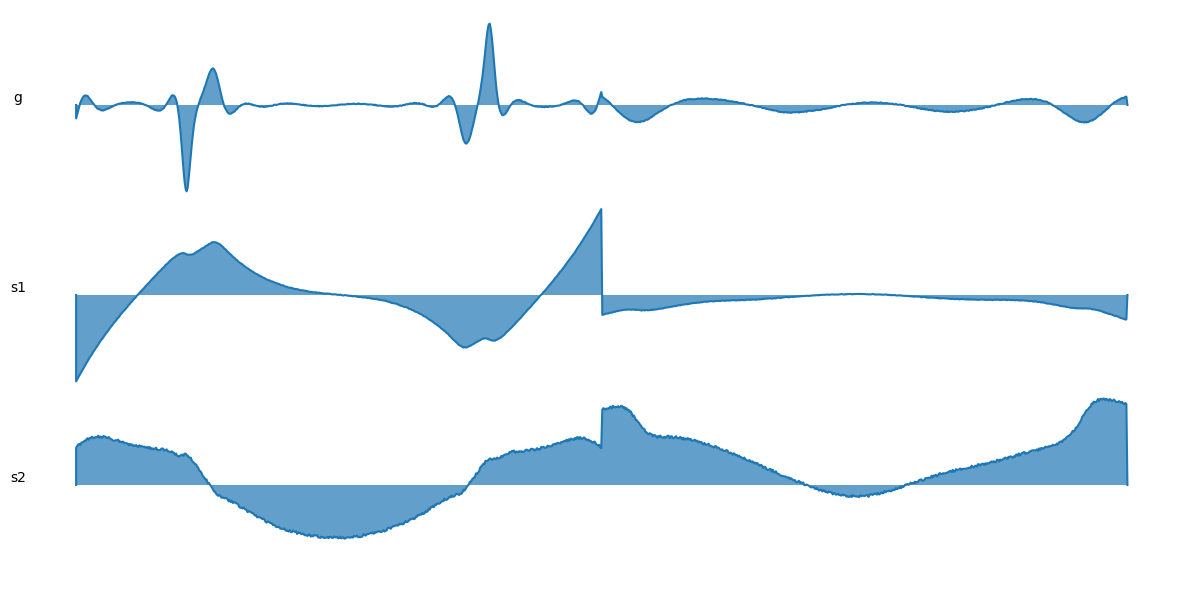

In [57]:
processor = OptPulseProcessor(N=2, drift=tensor([sigmaz()]*2))
processor.add_drift((-0.5)*omegaq1*sigmaz(), targets=0)
processor.add_drift((-0.5)*omegaq2*sigmaz(), targets=1)
processor.add_control(tensor([sigmay(), sigmay()]),label="g",targets=[0,1])
processor.add_control(omega1*v1*sigmay(),label="s1",targets=0)
processor.add_control(omega2*v2*sigmay(),label="s2",targets=1)

setting_args = {"X": {"num_tslots": 500, "evo_time": 1},
                "ISWAP": {"num_tslots": 500, "evo_time": 1},
                }

tlist, coeffs = processor.load_circuit(
                qc, setting_args=setting_args, merge_gates=False)

processor.plot_pulses()


In [58]:
len(processor.pulses[0].coeff)

1000

# GRAPE 확실히 이상해